In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import * 
import sklearn.linear_model
import statsmodels.api as sm
import re
import os.path
import sklearn.covariance

%matplotlib inline

In [2]:
batch_name = "run_20210307_sgd_init=greedy-partial_seed=1_smoothed_jac"
output_path = os.path.join("/Users/regevschweiger/git/matshuff/combined/datasets/ela_chr19", batch_name)

target_hist = pd.read_csv("/Users/regevschweiger/Documents/matshuff_data/ela_19/counts.txt", sep="\t")
dcounts = pd.read_csv("/Users/regevschweiger/Documents/matshuff_data/ela_19/dcounts.txt", sep="\t")

thetas = pd.read_csv(os.path.join(output_path, "output.10000000000.thetas"), sep="\s+", header=None).values
hists = pd.read_csv(os.path.join(output_path, "output.10000000000.hists"), sep="\s+", header=None).values

                                 

Text(0, 0.5, '#')

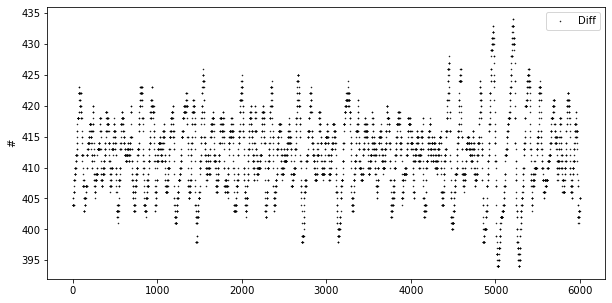

In [27]:
plt.figure(figsize=(10,5))
plt.plot(hists[4000:,100], 'k.', label="Diff", ms=1)
#plt.axhline(0)
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.ylabel("#")


In [28]:
hists[4000:,:].shape

(6000, 5000)

<AxesSubplot:>

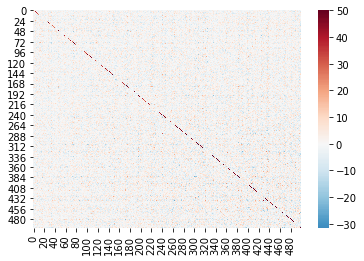

In [50]:
ECOV = sklearn.covariance.EmpiricalCovariance(store_precision=False).fit(hists[4000:,:])

plt.figure()
sns.heatmap(ECOV.covariance_[:500,:500], center=0, cmap="RdBu_r", vmax=50)

<AxesSubplot:>

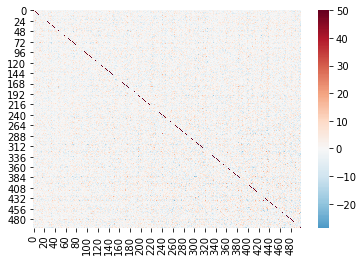

In [51]:
LWCOV = sklearn.covariance.LedoitWolf(store_precision=False).fit(hists[4000:,:])

plt.figure()
sns.heatmap(LWCOV.covariance_[:500,:500], center=0, cmap="RdBu_r", vmax=50)

In [52]:
LWCOV.shrinkage_

0.09021338391560887